## Project description.

In this project, we are training a word2vec model from scratch and extracting the word representation. After training the model, we are going to implement at least one intrinsic method to evaluate the word embeddings, taking into account all the guidelines essential to obtain an efficient NLP system.  In fact, word2vec model we are going to train, also known as Skip-gram model, is about optimize a supervised classification problem. More specifically, given a context word, we want to train a model such that it can predict a target word, one of the words appeared within a predefined window size from the context word. This target word can be the closest neigbor of the input word.


## Objectives.
Word2vec model we are going to train, also known as Skip-gram model, is about optimize a supervised classification problem. More specifically, given a context word, we want to train a model such that it can predict a target word, one of the words appeared within a predefined window size from the context word. This target word can be the closest neigbor of the input word.

In [40]:
###*******Relevant Librairies*******###
import pandas as pd
import numpy as np
import glob
import re
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os
import codecs
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
 
warnings.filterwarnings(action = 'ignore')
 
import gensim
from gensim.models import Word2Vec
import re
from string import punctuation 


## 1- Read the text data set.

In [41]:
f = codecs.open('64553-1.txt', 'r', 'UTF-8')
for line in f:
    print(line)

﻿Although the designs, which German philosophers conceived and German

statesmen and strategists spent thirty years in perfecting, for the

conquest of our Cape territories and the creation of a Greater Germany

extending from the Mediterranean to Table Bay, are best illustrated and

exposed by the defiantly defensive policy they pursued in South-West

Africa, the rise, development and fall of the German Colonial Empire is

more completely epitomised in the chapter dealing with the Cameroons.



The establishment of the German East African protectorate forms a story

that is intensely interesting, inasmuch as it reveals the duplicity of

Teutonic methods in their relations with native races, European rivals

and their own agents. Bismarck, the last barbarian of genius, repudiated

Dr. Karl Peters when, equipped with private capital and acting on his

own initiative, he was acquiring in the hinterland of Zanzibar a

well-watered, fertile province equal in extent to South Germany, and

o

## 2- Preparation of the text file.

In [42]:
sample = open('64553-1.txt', encoding="utf-8", errors='ignore')
s = sample.read()
 
# Replaces escape character with space
text = s.replace("\n", " ")

In [43]:
print(text)

﻿Although the designs, which German philosophers conceived and German statesmen and strategists spent thirty years in perfecting, for the conquest of our Cape territories and the creation of a Greater Germany extending from the Mediterranean to Table Bay, are best illustrated and exposed by the defiantly defensive policy they pursued in South-West Africa, the rise, development and fall of the German Colonial Empire is more completely epitomised in the chapter dealing with the Cameroons.  The establishment of the German East African protectorate forms a story that is intensely interesting, inasmuch as it reveals the duplicity of Teutonic methods in their relations with native races, European rivals and their own agents. Bismarck, the last barbarian of genius, repudiated Dr. Karl Peters when, equipped with private capital and acting on his own initiative, he was acquiring in the hinterland of Zanzibar a well-watered, fertile province equal in extent to South Germany, and obtaining from t

## 3- Preparation for Training Data: Tokenization and Mapping.

In order to prepare the training data, we are tokenizing the text first. When it comes to tokenize, there exists many techniques such as getting rid of words appearing in very high or vey low frequency. However, in this work, we just split the text with a simple method showing in the cell below since the focus is not tokenization.

After that, we assign an integer to each word as its id via the mapping function. In addition, using "word_to_id" and "id_to_word" to record the mapping relationships. The code is implemented in the following cell.

In [44]:
def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

def mapping(tokens):
    '''create a map between tokens and indices'''
    word_to_id = {}
    id_to_word = {}
    
    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token
    
    return word_to_id, id_to_word
tokens = tokenize(text)
word_to_idex, idex_to_word = mapping(tokens)

In [45]:
tokens

['although',
 'the',
 'designs',
 'which',
 'german',
 'philosophers',
 'conceived',
 'and',
 'german',
 'statesmen',
 'and',
 'strategists',
 'spent',
 'thirty',
 'years',
 'in',
 'perfecting',
 'for',
 'the',
 'conquest',
 'of',
 'our',
 'cape',
 'territories',
 'and',
 'the',
 'creation',
 'of',
 'a',
 'greater',
 'germany',
 'extending',
 'from',
 'the',
 'mediterranean',
 'to',
 'table',
 'bay',
 'are',
 'best',
 'illustrated',
 'and',
 'exposed',
 'by',
 'the',
 'defiantly',
 'defensive',
 'policy',
 'they',
 'pursued',
 'in',
 'south',
 'west',
 'africa',
 'the',
 'rise',
 'development',
 'and',
 'fall',
 'of',
 'the',
 'german',
 'colonial',
 'empire',
 'is',
 'more',
 'completely',
 'epitomised',
 'in',
 'the',
 'chapter',
 'dealing',
 'with',
 'the',
 'cameroons',
 'the',
 'establishment',
 'of',
 'the',
 'german',
 'east',
 'african',
 'protectorate',
 'forms',
 'a',
 'story',
 'that',
 'is',
 'intensely',
 'interesting',
 'inasmuch',
 'as',
 'it',
 'reveals',
 'the',
 'dupl

In [46]:
word_to_idex

{'cost': 0,
 'except': 1,
 'duped': 2,
 'consular': 3,
 'mr': 4,
 'temporary': 5,
 'there': 6,
 'established': 7,
 'she': 8,
 'future': 9,
 'geological': 10,
 'river': 11,
 'planned': 12,
 'countries': 13,
 'nigeria': 14,
 '_history': 15,
 'purely': 16,
 'particulars': 17,
 'concessions': 18,
 'transfer': 19,
 'siegfreid': 20,
 'final': 21,
 'secured': 22,
 'positions': 23,
 'possession': 24,
 'into': 25,
 'little': 26,
 'geographical': 27,
 'designs': 28,
 'bold': 29,
 'necessary': 30,
 'june': 31,
 'knowledge': 32,
 'eltester': 33,
 'conquest': 34,
 'existed': 35,
 'allow': 36,
 'unrest': 37,
 'rights': 38,
 'consolidated': 39,
 'dominion': 40,
 'hesitate': 41,
 'proposal': 42,
 'portuguese': 43,
 'preserve': 44,
 'mercies': 45,
 'buea': 46,
 'secure': 47,
 'calls': 48,
 'blundering': 49,
 'paper': 50,
 'feeling': 51,
 'non': 52,
 'suspicious': 53,
 'i': 54,
 'protectorate': 55,
 'my': 56,
 'vehicles': 57,
 'object': 58,
 'cape': 59,
 'extend': 60,
 'telephone': 61,
 'salaam': 62,
 '

## 4- Generate training Data
- We know tokens are strings, we need to encode them numerically using one-hot vectorization. 
- We also need to generate the input and target values.
- we need to also create the context of each word

In [47]:
def generate_training_data(tokens, word_to_id, window_size):
    N = len(tokens)
    X, Y = [], []

    for i in range(N):
        nbr_inds = list(range(max(0, i - window_size), i)) + \
                   list(range(i + 1, min(N, i + window_size + 1)))
        for j in nbr_inds:
            X.append(word_to_id[tokens[i]])
            Y.append(word_to_id[tokens[j]])
            
    X = np.array(X)
    X = np.expand_dims(X, axis=0)
    Y = np.array(Y)
    Y = np.expand_dims(Y, axis=0)
            
    return X, Y

In [48]:
# Let’s generate some training data with a window size of three

In [49]:
X, Y = generate_training_data(tokens, word_to_idex, 3)
vocab_size = len(idex_to_word)
m = Y.shape[1]
# turn Y into one hot encoding
Y_one_hot = np.zeros((vocab_size, m))
Y_one_hot[Y.flatten(), np.arange(m)] = 1

In [50]:
print(X.shape)
print(Y.shape)
print(m)
print(vocab_size)

(1, 22794)
(1, 22794)
22794
1260


## 5- Training Process.

After generating training data, we now move on the training part. In fact, training word2vec model is similar to the majority of neural network models. It is done by following these steps:

* Initializing weights (parameters that we want to train).

* Propagating forward (Forward propagation).

* calculating the cost.

* Propagating backward (Backward propagation).

* Updating the weights.

The whole process will be repeated for several iterations based on how many epochs we want to train.

### 5.1- Initialization of the parameters (weights)

There are two layers in the model which need to be initialized and trained, the word embedding layer and the dense layer (since the data is large).

In [52]:
def initialize_wrd_emb(vocab_size, emb_size):
    """
    vocab_size: int. vocabulary size of your corpus or training data
    emb_size: int. word embedding size. How many dimensions to represent each vocabulary
    """
    WRD_EMB = np.random.randn(vocab_size, emb_size) * 0.01
    
    assert(WRD_EMB.shape == (vocab_size, emb_size))
    return WRD_EMB

def initialize_dense(input_size, output_size):
    """
    input_size: int. size of the input to the dense layer
    output_szie: int. size of the output out of the dense layer
    """
    W = np.random.randn(output_size, input_size) * 0.01
    
    assert(W.shape == (output_size, input_size))
    return W

def initialize_parameters(vocab_size, emb_size):
    WRD_EMB = initialize_wrd_emb(vocab_size, emb_size)
    W = initialize_dense(emb_size, vocab_size)
    
    parameters = {}
    parameters['WRD_EMB'] = WRD_EMB
    parameters['W'] = W
    
    return parameters

### 5.2- Forward Propagation

Forward propagation requires three steps which are: the first step is to obtain input word's vector representation from word embedding; after that, pass the vector to the dense layer and then applying softmax function to the output of the dense layer which gives us the probability of each word appearing near the given input word. The cell below is the python code which does that.

In [53]:
def ind_to_word_vecs(inds, parameters):
    """
    inds: numpy array. shape: (1, m)
    parameters: dict. weights to be trained
    """
    m = inds.shape[1]
    WRD_EMB = parameters['WRD_EMB']
    word_vec = WRD_EMB[inds.flatten(), :].T
    
    assert(word_vec.shape == (WRD_EMB.shape[1], m))
    
    return word_vec

def linear_dense(word_vec, parameters):
    """
    word_vec: numpy array. shape: (emb_size, m)
    parameters: dict. weights to be trained
    """
    m = word_vec.shape[1]
    W = parameters['W']
    Z = np.dot(W, word_vec)
    
    assert(Z.shape == (W.shape[0], m))
    
    return W, Z



def forward_propagation(inds, parameters):
    word_vec = ind_to_word_vecs(inds, parameters)
    W, Z = linear_dense(word_vec, parameters)
    softmax_out = softmax(Z)
    
    caches = {}
    caches['inds'] = inds
    caches['word_vec'] = word_vec
    caches['W'] = W
    caches['Z'] = Z
    
    return softmax_out, caches

### 5.3- Backpropagation

During this step, we are calculating gradients of the trainable weights with respect to the loss function and updating the weight with its associated gradient. Following is the code for backward propagation process.

In [54]:
def softmax_backward(Y, softmax_out):
    """
    Y: labels of training data. shape: (vocab_size, m)
    softmax_out: output out of softmax. shape: (vocab_size, m)
    """
    dL_dZ = softmax_out - Y
    
    assert(dL_dZ.shape == softmax_out.shape)
    return dL_dZ

def dense_backward(dL_dZ, caches):
    """
    dL_dZ: shape: (vocab_size, m)
    caches: dict. results from each steps of forward propagation
    """
    W = caches['W']
    word_vec = caches['word_vec']
    m = word_vec.shape[1]
    
    dL_dW = (1 / m) * np.dot(dL_dZ, word_vec.T)
    dL_dword_vec = np.dot(W.T, dL_dZ)

    assert(W.shape == dL_dW.shape)
    assert(word_vec.shape == dL_dword_vec.shape)
    
    return dL_dW, dL_dword_vec

def backward_propagation(Y, softmax_out, caches):
    dL_dZ = softmax_backward(Y, softmax_out)
    dL_dW, dL_dword_vec = dense_backward(dL_dZ, caches)
    
    gradients = dict()
    gradients['dL_dZ'] = dL_dZ
    gradients['dL_dW'] = dL_dW
    gradients['dL_dword_vec'] = dL_dword_vec
    
    return gradients

In [55]:
def update_parameters(parameters, caches, gradients, learning_rate):
    vocab_size, emb_size = parameters['WRD_EMB'].shape
    inds = caches['inds']
    dL_dword_vec = gradients['dL_dword_vec']
    m = inds.shape[-1]
    
    parameters['WRD_EMB'][inds.flatten(), :] -= dL_dword_vec.T * learning_rate

    parameters['W'] -= learning_rate * gradients['dL_dW']

In [56]:
def cross_entropy(z, y):
    #return - np.sum(np.log(z) * y)
    z = np.array(z)
    m = z.shape[1]
    cost = -(1 / m) * np.sum(np.sum(y * np.log(z + 0.001), axis=0, keepdims=True), axis=1)
    return cost

def softmax(X):
    """
    X: output out of the dense layer. shape: (vocab_size, m)
    """
    softmax_out = np.divide(np.exp(X), np.sum(np.exp(X), axis=0, keepdims=True) + 0.001)
    
    assert(softmax_out.shape == X.shape)

    return softmax_out

### 5.4- Training the model.

To train the model, we implement the function "skipgram_model_training" where we repeat the process of forward propagation, backward propagation and weight updating. During the training, we expect the cost after each epoch to decrease.

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")

In [58]:
from datetime import datetime

import matplotlib.pyplot as plt


def skipgram_model_training(X, Y, vocab_size, emb_size, learning_rate, epochs, batch_size=256, parameters=None, print_cost=False, plot_cost=True):
    costs = []
    m = X.shape[1]
    
    if parameters is None:
        parameters = initialize_parameters(vocab_size, emb_size)
    
    begin_time = datetime.now()
    for epoch in range(epochs):
        epoch_cost = 0
        batch_inds = list(range(0, m, batch_size))
        np.random.shuffle(batch_inds)
        for i in batch_inds:
            X_batch = X[:, i:i+batch_size]
            Y_batch = Y[:, i:i+batch_size]
#Let us call the different functions implement above:forward_propagation, backward_propagation,
#update_parameters, and cross_entropy.
            softmax_out, caches = forward_propagation(X_batch, parameters)
            gradients = backward_propagation(Y_batch, softmax_out, caches)
            update_parameters(parameters, caches, gradients, learning_rate)
            cost = cross_entropy(softmax_out, Y_batch)
            epoch_cost += np.squeeze(cost)
            
        costs.append(epoch_cost)
        if print_cost and epoch % (epochs // 500) == 0:
            print("Cost after epoch {}: {}".format(epoch, epoch_cost))
        if epoch % (epochs // 100) == 0:
            learning_rate *= 0.98
    end_time = datetime.now()
    print('training time: {}'.format(end_time - begin_time))
    return parameters, costs

In [59]:
paras, costs = skipgram_model_training(X, Y_one_hot, vocab_size, 50, 0.05, 2000, batch_size=128, parameters=None, print_cost=True)

Cost after epoch 0: 1131.8980908091496
Cost after epoch 4: 1130.8771429412013
Cost after epoch 8: 1088.5174827711041
Cost after epoch 12: 1057.611412461138
Cost after epoch 16: 1035.8127543988983
Cost after epoch 20: 1020.3866125972913
Cost after epoch 24: 1008.073270533217
Cost after epoch 28: 997.476172133302
Cost after epoch 32: 989.0554877889017
Cost after epoch 36: 982.2303326648114
Cost after epoch 40: 977.6499114585256
Cost after epoch 44: 974.0241331082615
Cost after epoch 48: 971.343430164339
Cost after epoch 52: 969.1702842389296
Cost after epoch 56: 967.4422174642633
Cost after epoch 60: 965.9001411111958
Cost after epoch 64: 964.5178526929352
Cost after epoch 68: 963.1162736186759
Cost after epoch 72: 961.8472472721036
Cost after epoch 76: 960.5772766593567
Cost after epoch 80: 959.7692305167122
Cost after epoch 84: 958.4073896506549
Cost after epoch 88: 957.3462120194354
Cost after epoch 92: 956.0733485237719
Cost after epoch 96: 954.4508774657309
Cost after epoch 100: 953

Cost after epoch 828: 825.3134061561585
Cost after epoch 832: 825.429334141962
Cost after epoch 836: 824.9991107201326
Cost after epoch 840: 825.2736553090826
Cost after epoch 844: 824.8152931216758
Cost after epoch 848: 824.9159963979857
Cost after epoch 852: 824.7441199555947
Cost after epoch 856: 824.2455420954294
Cost after epoch 860: 824.2015057657073
Cost after epoch 864: 823.9910876477503
Cost after epoch 868: 824.1571042913885
Cost after epoch 872: 823.3517985476999
Cost after epoch 876: 823.8300039897496
Cost after epoch 880: 823.9274926417006
Cost after epoch 884: 823.1659040096825
Cost after epoch 888: 823.3101997039358
Cost after epoch 892: 823.2650457701941
Cost after epoch 896: 823.1376102132534
Cost after epoch 900: 823.0467074323263
Cost after epoch 904: 822.4693008548076
Cost after epoch 908: 822.55026391465
Cost after epoch 912: 822.5361405213556
Cost after epoch 916: 822.4302398581787
Cost after epoch 920: 822.1849464574456
Cost after epoch 924: 822.1888240611031
Cos

Cost after epoch 1636: 811.8691605112617
Cost after epoch 1640: 811.8846306037216
Cost after epoch 1644: 811.8638450239486
Cost after epoch 1648: 811.7787106655903
Cost after epoch 1652: 811.675326901676
Cost after epoch 1656: 811.650527906492
Cost after epoch 1660: 811.8084818799048
Cost after epoch 1664: 811.5009481109702
Cost after epoch 1668: 811.612660779539
Cost after epoch 1672: 811.5828124954794
Cost after epoch 1676: 811.3168291877372
Cost after epoch 1680: 811.6500582554111
Cost after epoch 1684: 811.6757478413448
Cost after epoch 1688: 811.5466895523733
Cost after epoch 1692: 811.5928127302255
Cost after epoch 1696: 811.4665197337805
Cost after epoch 1700: 811.4293834647067
Cost after epoch 1704: 811.3689554451139
Cost after epoch 1708: 811.2413091838835
Cost after epoch 1712: 811.3439156494788
Cost after epoch 1716: 811.48520882435
Cost after epoch 1720: 811.5249783796409
Cost after epoch 1724: 811.2350807061646
Cost after epoch 1728: 811.3085380407932
Cost after epoch 1732

## Plot of the cost function.

After training our model, let us plot the cost function in terms of the epochs.

Text(0, 0.5, 'Cost')

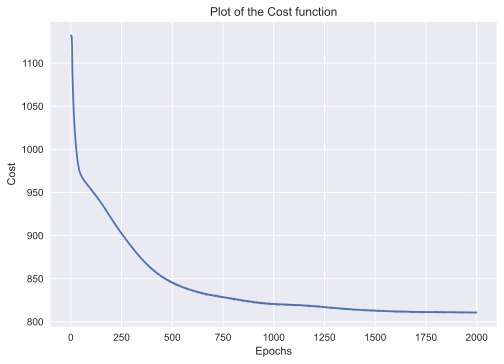

In [60]:
epochs = 2000
plt.plot(np.arange(epochs), costs)
plt.title("Plot of the Cost function")
plt.xlabel('Epochs')
plt.ylabel('Cost')

After training, we can see that our loss function is decrasing and after 1500 epochs, it become a little bit stable around 810.

## 6- Model Evaluation Process.

In order to test our model, we are going to use intrinsic methods to evaluate the word embeddings. 

In fact, in NLP, word embeddings can be evaluated using intrinsic evaluation methods. These methods envolve assessing the quality of the embeddings based on how well they perform on specific NLP tasks and include: word similarity tasks,  word analogy tasks, named entity recognition (NER) tasks, and part-of-speech (POS) tagging tasks. In this work, we are focussing on: 

* **Word similarity test**, where the embeddings are evaluated based on their ability to capture the similarity between pairs of words .

* **Word analogy test**, where the embeddings are evaluated based on their ability to solve analogies like "man is to woman as king is to queen" .

### 6.1- Word similarity test.

In [61]:
## This function return for each word we have its vector ##
def get_word_vector(word):
    if word in word_to_idex:
        word_index = word_to_idex[word]
        word_vector = paras['WRD_EMB'][word_index]
        return word_vector
    else:
        return None

## This function return for a given words, the words that are most similar to it based on their
## cosine similarities.
def get_most_similar_words(word, num_words):
    word_vector = get_word_vector(word)
    if word_vector is not None:
        cosine_similarities = np.dot(paras['WRD_EMB'], word_vector) / (np.linalg.norm(paras['WRD_EMB'], axis=1) * np.linalg.norm(word_vector))
        most_similar_word_indices = np.argsort(cosine_similarities)[::-1][1:num_words+1]
        most_similar_words = [idex_to_word[index] for index in most_similar_word_indices]
        return most_similar_words
    else:
        return None

In [62]:
## Test word similarity: Let us find the 3 most words of the chosen words ##
print(get_most_similar_words("development", num_words=3))
print(get_most_similar_words("cameroon", num_words=3))
print(get_most_similar_words("construction", num_words=3))

['more', 'acquired', 'success']
['collected', 'life', 'understand']
['practice', 'furtherance', 'so']


From this text, three words that are the most similar to **"development"** are **"more", "acquired", and "success"**. The words that are the most similar to **"Cameroon"** in this context are **"collected", "life", and "understand"**. The words which are the most similar to **"construction"** are **"practice", "furtherance", and "so"**. On average, these similarities really make sense in the context of our text.

### 6.2- Word analogy test.

Below is the implementation of the word analogy test. We first start by getting the vectors of 3 words we are going to find their analogy. If these word vectors exist, we find their analogy using the cosine similarities. 

In [63]:
# Test word analogy
def word_analogy(a, b, c):
    a_vec = get_word_vector(a)
    b_vec = get_word_vector(b)
    c_vec = get_word_vector(c)
    if a_vec is not None and b_vec is not None and c_vec is not None:
        d_vec = b_vec - a_vec + c_vec ## Get the analogy word vector
        cosine_similarities = np.dot(paras['W'], d_vec) / (np.linalg.norm(paras['W'], axis=1) * np.linalg.norm(d_vec))
        closest_word_index = np.argmax(cosine_similarities)
        closest_word = idex_to_word[closest_word_index]
        return closest_word
    else:
        return None

print(word_analogy('nations', 'regulate', 'among'))
print(word_analogy('suspicious', 'official', 'capital'))
print(word_analogy('colony', 'administrators', 'country'))

nations
under
doubting


From this, we can see that the analogy of the words **'nations', 'regulate', 'among'** is **nations**; the one for **'suspicious', 'official', 'capital'** is **under**, and the analogy of words **'colony', 'administrators', 'country'** is **doubting**.

## 7- Words neighbors.

For each word in our vocabulary, let us find its four nearest neighbors

In [64]:
X_test = np.arange(vocab_size)
X_test = np.expand_dims(X_test, axis=0) # The input words are in the vocabulary
softmax_test, _ = forward_propagation(X_test, paras) # Train the model
top_sorted_inds = np.argsort(softmax_test, axis=0)[-4:,:] # Index of the four top neighbor

In [65]:
## the input is one word in the vocabulary, and the outputs are the input's four top neighbors.
for input_ind in range(vocab_size):
    input_word = idex_to_word[input_ind]
    output_words = [idex_to_word[output_ind] for output_ind in top_sorted_inds[::-1, input_ind]]
                                                                               
    print("{}'s neighbor words: {}".format(input_word, output_words))

cost's neighbor words: ['dr', 'paul', 'grotefeld', 'trouble']
except's neighbor words: ['which', 'its', 'their', 'make']
duped's neighbor words: ['the', 'of', 'to', 'and']
consular's neighbor words: ['procurable', 'belated', 'consular', 'turned']
mr's neighbor words: ['british', 'flag', 'my', 'taken']
temporary's neighbor words: ['bismarck', 'uneasiness', 'experienced', 'street']
there's neighbor words: ['commercial', 'when', 'desire', 'curiosity']
established's neighbor words: ['it', 'station', 'the', 'region']
she's neighbor words: ['the', 'of', 'in', 'africa']
future's neighbor words: ['the', 'territories', 'cameroons', 'in']
geological's neighbor words: ['vegetation', 'features', 'geographical', 'geological']
river's neighbor words: ['the', 'to', 'from', 'orange']
planned's neighbor words: ['the', 'of', 'to', 'and']
countries's neighbor words: ['world', 'most', 'productive', 'never']
nigeria's neighbor words: ['found', 'the', 'to', 'by']
_history's neighbor words: ['africa_', 'soon

Above, we are represented each word neighbors. We can see for example that four neighbors of the words **knowledge** are **'language', 'intelligent', 'acquire', 'mismanagement'** which means that in the text, when **knowledge** was mentioned, the words **'language', 'intelligent', 'acquire', 'mismanagement'** tended to be mentioned too.

## 8- Visualization of the embbedings in 2D.

In order to visualize in 2D, we are going to use PCA to reduce the dimension first, after that we will keep the first 2 principal component and then we will visualize the embbedings.

In [81]:
## For each word in our tokens, we get its corresponding vector and append in a dictionary
#called words_dict ##
words = (tokens)
words_dict={}
for word in words:
    words_dict[word]=get_word_vector(word)
words_dict

{'although': array([ 1.67434374,  7.18957426,  4.14418955,  3.07353836,  0.62113429,
        -1.85369583, -0.9607796 ,  1.83160519, -1.94571615, -2.37705052,
        -0.22962366,  0.75699517,  2.39727273,  0.27365579,  1.59839441,
         0.81159002, -2.72994202,  1.86649743,  0.74767703, -2.11281491,
         4.45504386, -2.72540639,  1.4406757 , -3.21564404,  1.69231704,
        -6.46748611, -1.83701336,  0.82671712, -3.24197427,  1.12944209,
         2.07168312,  0.42348148,  0.78684476,  0.53198917, -2.60163188,
         0.15623048,  1.20521143,  6.28263039, -1.57067182, -1.4176186 ,
        -1.7478917 ,  0.3673259 , -4.70466358, -2.57060746,  1.87643921,
         1.0383821 ,  3.75453184,  1.72315794,  1.54153037, -0.76125178]),
 'the': array([ 1.66791522, -2.72003264,  0.63269866,  4.99195833, -3.70289928,
        -4.34868432, -1.45945743,  0.79306581, -2.87224558, -1.33013814,
        -1.7652461 , -0.37596922, -2.34760543, -2.57748383, -1.88335465,
        -2.56741525,  3.443190

We can see each word and its vector from the above output. Now let us visualize those words in order to see how closer they are. To do so, we first perform a PCA by calling a built-in PCA function. After that, we select the two first principal components and visualize them for each word using a scatter plot. The function below is the one that does it.

In [82]:
def display_pca_scatterplot(model, words):
       
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
   
    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

Now, let us call our function and visualize our words.

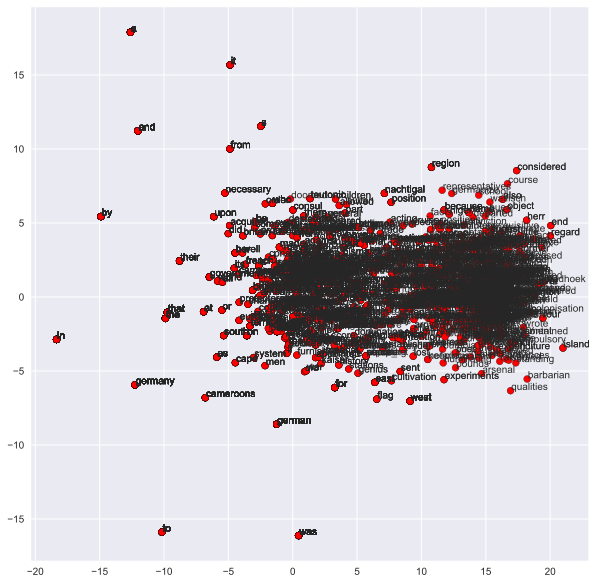

In [80]:
display_pca_scatterplot(model=words_dict, words=words)

From the visualization, we observe that most of the words are close to each other and just few of them such as **"to", "by", "was", "in", "by",etc** are far away from others. Those words which are far are in majority the short words.

We can conclude that the text we pick was not a representative of the language, the words used inside were really similar and close to each other. Each time when one was mentioned, others were likely to be mentioned too.

We can really see how random the text was selected based on these visualization.